In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exercise 1

# a)

In [ ]:
data = pd.read_csv('C:\\Users\\gonza\\Desktop\\Python\\MI_course\\Data\\applesOranges.csv')
data = np.array(data)
labels = data[:,2]
data = data[:,:2]

In [ ]:
print(data.shape)
print(labels.shape)
plt.scatter(data[:,0], data[:,1], c=labels)

# b)

In [ ]:
def get_vector():
    w = []
    angle = np.arange(0,190,10)
    for angle in angle:
        w1 = np.cos(np.radians(angle))
        w2 = np.sin(np.radians(angle))
        w.append([w1,w2])
    return np.array(w)

In [ ]:
def activation(h):
    if h >= 0:
        return 1
    else:
        return 0

In [ ]:
def classify_many(W, data, theta = 0):
    pred = []
    for x in data:
            h = np.dot(W,x) - theta
            pred.append(list(map(activation, h)))
    return np.array(pred).T

In [ ]:
def evaluate(pred, labels, many_w = True):
    if many_w == True:
        evaluations = []
        for pred in pred:
            evaluations.append(np.sum(np.equal(pred,labels))/len(labels))
        return evaluations
    else:
        evaluation = np.sum(np.equal(pred,labels))/len(labels)
        return evaluation

In [ ]:
W = get_vector()
pred = classify_many(W, data)
print(pred.shape)
evaluations = evaluate(pred, labels)

In [ ]:
angles = np.arange(0,190,10)
plt.plot(angles, evaluations)

In [ ]:
def classify(w,data,theta):
    pred = []
    for x in data:
            h = np.dot(w,x) - theta
            pred.append(activation(h))
    return np.array(pred).T

# c)

In [ ]:
wopt = W[np.argmax(evaluations)]
thetas = np.arange(-3,3.1,0.1)
pred2 = []
for theta in thetas:
    prediction = classify(wopt,data,theta = theta)
    pred2.append(prediction)
evaluations2 = evaluate(pred2, labels)
thetaopt = thetas[np.argmax(evaluations2)]

# d)

In [ ]:
optclassification = classify(wopt,data,theta = thetaopt)
plt.figure(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], c=optclassification)
plt.annotate('',wopt,(0,0),arrowprops = {'arrowstyle':'->'})

# f) & e)

In [ ]:
Ws = []
for w in W:
    Bs = []
    for bias in np.arange(-2,2,0.1):
        prediction = classify(w,data, bias)
        Bs.append(evaluate(prediction,labels,many_w=False))
    Ws.append(Bs)
Ws = np.array(Ws)
Ws.shape

In [ ]:
df = pd.DataFrame(Ws)
df.columns = np.round(np.arange(-2,2,0.1),2)
df.index = np.arange(1,20)
sns.heatmap(df)

In [ ]:
biases = np.arange(-2,2,0.1)
best_w=W[np.unravel_index(np.argmax(Ws),Ws.shape)[0]]
best_bias=biases[np.unravel_index(np.argmax(Ws),Ws.shape)[1]]

In [ ]:
best_predictions=classify(data=data,w=best_w,theta=best_bias)
plt.scatter(data[:,0],data[:,1],c=best_predictions)
plt.annotate("", xy=(wopt[0],wopt[1]), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
plt.title("classification of model with best params")

# Exercise 2

# a)

In [2]:
def create_MLPs(nr_MLPs = 50):
    W = [np.random.normal(0,1,10) for n in range(nr_MLPs)]
    A = [np.random.normal(0,2,10) for n in range(nr_MLPs)]
    B = [np.random.uniform(-2,2,10) for n in range(nr_MLPs)]
    return np.array(W), np.array(A), np.array(B)

In [3]:
def output(W,A,B,x):
    yest = np.dot(W, np.tanh(A*(x-B)))
    return yest

In [4]:
def plot_MLPs(nr_MLPs = 50):
    W,A,B = create_MLPs(nr_MLPs)
    X = np.arange(-2,2.05,0.05)
    Yest = []
    for i in range(nr_MLPs):
        yest = [output(W[i],A[i],B[i],x) for x in X]
        plt.plot(X,yest)
        

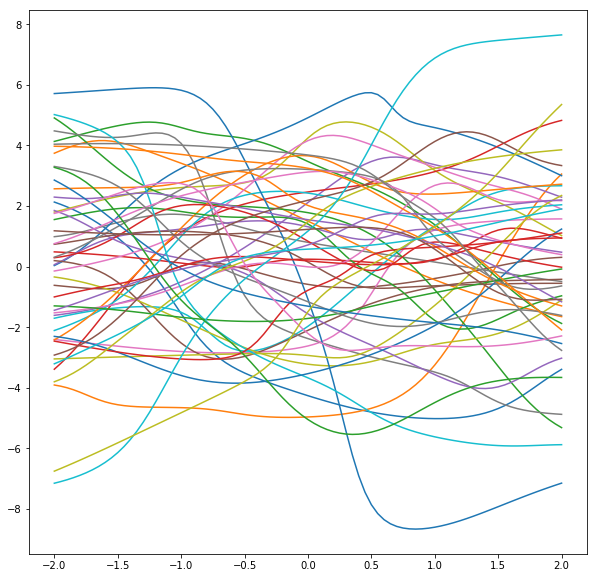

In [5]:
plt.figure(figsize = (10,10))
plot_MLPs()

# b)

In [6]:
def create_MLPs2(nr_MLPs = 50):
    W = [np.random.normal(0,1,10) for n in range(nr_MLPs)]
    A = [np.random.normal(0,0.5,10) for n in range(nr_MLPs)]
    B = [np.random.uniform(-2,2,10) for n in range(nr_MLPs)]
    return np.array(W), np.array(A), np.array(B)

In [7]:
def plot_MLPs2(nr_MLPs = 50):
    W,A,B = create_MLPs2(nr_MLPs)
    X = np.arange(-2,2.05,0.05)
    Yest = []
    for i in range(nr_MLPs):
        yest = [output(W[i],A[i],B[i],x) for x in X]
        plt.plot(X,yest)

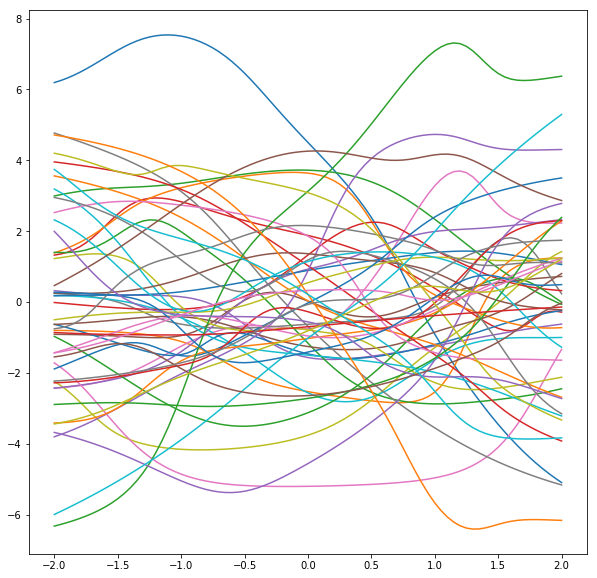

In [8]:
plt.figure(figsize = (10,10))
plot_MLPs()

# c)

In [34]:
def plot_minMSE(nr_MLPs=50):
    W,A,B = create_MLPs(nr_MLPs)
    X = np.arange(-2,2.05,0.05)
    yestopt1 = []
    for i in range(nr_MLPs):
        yest1 = [output(W[i],A[i],B[i],x) for x in X]
    MSE1 = 1/2*(yest1+X)**2
    W2,A2,B2 = create_MLPs2(nr_MLPs)
    yestopt2 = []
    for i in range(nr_MLPs):
        yest2 = [output(W2[i],A2[i],B2[i],x) for x in X]
    MSE2 = 1/2*(yest2+X)**2
    yestopt1 = [output(W[np.argmin(MSE1)],A[np.argmin(MSE1)],B[np.argmin(MSE1)],x) for x in X]
    yestopt2 = [output(W2[np.argmin(MSE2)],A2[np.argmin(MSE2)],B2[np.argmin(MSE2)],x) for x in X]
    plt.plot(X,yestopt1)
    plt.plot(X,yestopt2)

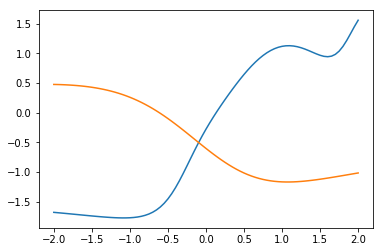

In [42]:
plot_minMSE()